In [2]:
import os
import pandas as pd

In [3]:
# Load in the two data sheets
xls = pd.ExcelFile('./dataset/Project Week Data.xlsx')
df1 = pd.read_excel(xls, 'Tiera Del Fuego data')
df2 = pd.read_excel(xls, "Pazzo's data")

In [4]:
(df1["Purchase Order Units"] - df1["Fulfilled Units"]).sum()

265267

In [5]:
df = df1.merge(df2, 'inner', ['SKU', 'Date'])
df.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week
0,DC East,2017-10-02,SKU001,10,10,519,0.020876,17.913664,0.076624,67,52,47,41
1,DC West,2017-10-02,SKU001,17,17,519,0.020876,17.913664,0.076624,67,52,47,41
2,DC East,2017-10-09,SKU001,24,24,241,0.595398,13.520821,0.171255,49,45,42,36
3,DC West,2017-10-09,SKU001,0,0,241,0.595398,13.520821,0.171255,49,45,42,36
4,DC East,2017-10-16,SKU001,0,0,559,0.000000,15.839939,0.088271,95,94,89,84


In [21]:

# df['cut_size'] = df['Purchase Order Units'] - df['Fulfilled Units']
# df['cost_of_cut'] = df['Average Price']*df['cut_size']
# df['dispatch_rate'] = df['Purchase Order Units'] / df['Fulfilled Units']
# df.to_csv("eda.csv")

# In the cell below, add a new cell to add any new columns that you would like to add to the entire dataframe.

In [24]:
df['prior_cut_size'] = df['Purchase Order Units'] - df['Fulfilled Units']
df['prior_cost_of_cut'] = df['Average Price']*df['prior_cut_size']
df['prior_dispatch_rate'] = df['Purchase Order Units'] / df['Fulfilled Units']
# Below variable is the list of top 15 sku to look at
sku_top15 = list(df.groupby("SKU").mean().sort_values("prior_cost_of_cut",ascending=False)[["prior_cost_of_cut"]][:15].index)
sku_top15_perc = df.groupby("SKU").sum().sort_values("prior_cost_of_cut",ascending=False)[["prior_cost_of_cut"]][:15].sum()/df.prior_cost_of_cut.sum()

In [25]:
df_top15 = df[df.SKU.isin(sku_top15)]["prior_cut_size"]

In [26]:
count = 0 
for i in df_top15 :
    if i >0 :
        count+=1
print(count)

286


In [27]:
len(df_top15)

1560

In [95]:
df_simple["average_price"] = df.groupby("SKU").mean().sort_values("prior_cost_of_cut",ascending=False)[["Average Price"]][:15].reset_index()["Average Price"]

In [100]:
(df_simple["Reduced"]).sum()

31538.235493144624

In [81]:
df_simple = pd.DataFrame({"SKU Top15" : list(total_cuts_reduced_d.keys()), "Reduced" : list(total_cuts_reduced_d.values())})

In [66]:
sku_mean = {}
total_cuts_reduced_d = {}
for i, sku in enumerate(sku_top15):
    sku_mean[sku] = df[df.SKU == sku][df.prior_cut_size > 0]["prior_cut_size"].mean()
    total_cuts_reduced = 0
    for i in (df[df.SKU == sku][df.prior_cut_size > 0]["prior_cut_size"]-df[df.SKU == sku][df.prior_cut_size > 0]["prior_cut_size"].mean()):
        if i > 0:
            total_cuts_reduced += i
    total_cuts_reduced_d[sku] = total_cuts_reduced

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
dfeast = df[df.DC == "DC East"]
dfwest = df[df.DC == "DC West"]
for i, sku in enumerate(df.SKU.unique()):
    df_east_temp = dfeast[dfeast.SKU == sku]
    df_west_temp = dfwest[dfwest.SKU == sku]
    
    df_east_temp["Prior_Inven_Change"]= df_east_temp["On Hand Inventory"].pct_change()*100
    df_east_temp["Prior_Price_change"]= df_east_temp["Average Price"].pct_change()*100
        
    df_west_temp["Prior_Inven_Change"]= df_west_temp["On Hand Inventory"].pct_change()*100
    df_west_temp["Prior_Price_change"]= df_west_temp["Average Price"].pct_change()*100
    
    if i == 0:
        df3 = pd.concat([df_east_temp, df_west_temp], ignore_index=True)
    else:
        df3 = pd.concat([df3, df_east_temp, df_west_temp], ignore_index=True)
df = df3.copy()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [24]:

#     forecast1_diff_east = []
#     for i,j in zip(df_east_temp["Consumer Ordered Units"][1:],df_east_temp["Forecast 1 Week"][:-1]):
#         forecast1_diff_east.append(i-j)
#     forecast1_diff_east.insert(0,None)
#     df_east_temp["forecast1_diff"] = forecast1_diff_east
        
#     forecast1_diff_west = []
#     for i,j in zip(df_west_temp["Consumer Ordered Units"][1:],df_west_temp["Forecast 1 Week"][:-1]):
#         forecast1_diff_west.append(i-j)
#     forecast1_diff_west.insert(0,None)
#     df_west_temp["forecast1_diff"] = forecast1_diff_west
# forecast 4
#     forecast4_diff_east = []
#     for i,j in zip(df_east_temp["Consumer Ordered Units"][4:],df_east_temp["Forecast 4 Week"][:-4]):
#         forecast4_diff_east.append(i-j)
#     for i in range(4):
#         forecast4_diff_east.insert(i,None)
#     df_east_temp["forecast4_diff"] = forecast4_diff_east
        
#     forecast4_diff_west = []
#     for i,j in zip(df_west_temp["Consumer Ordered Units"][4:],df_west_temp["Forecast 4 Week"][:-4]):
#         forecast4_diff_west.append(i-j)
#     for i in range(4):
#         forecast4_diff_west.insert(i,None)
#     df_west_temp["forecast1_diff"] = forecast4_diff_west 

#Do not change the code below this cell!!

In [25]:
numcols = len(df.columns)
dfeast = df3[df3.DC == "DC East"]
dfwest = df3[df3.DC == "DC West"]

In [26]:
for i, sku in enumerate(df.SKU.unique()):
    df_east_temp = dfeast[dfeast.SKU == sku]
    df_west_temp = dfwest[dfwest.SKU == sku]
    for j in range(5,numcols):
        df_east_temp.iloc[:,j] = df_east_temp.iloc[:,j].shift(1)
        df_west_temp.iloc[:,j] = df_west_temp.iloc[:,j].shift(1)
        
    if i == 0:
        new_df = pd.concat([df_east_temp, df_west_temp], ignore_index=True)
    else:
        new_df = pd.concat([new_df, df_east_temp, df_west_temp], ignore_index=True)
        
new_df[new_df.SKU == 'SKU002'].head()

c:\program files\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,DC,Date,SKU,Purchase Order Units,Fulfilled Units,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week,prior_cut_size,prior_cost_of_cut,prior_dispatch_rate,Prior_Inven_Change,Prior_Price_change
104,DC East,2017-10-02,SKU002,141,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,DC East,2017-10-09,SKU002,1212,0,75805.0,0.000000,13.009440,0.351913,10116.0,16824.0,15271.0,16263.0,0.0,0.000000,1.0,NaN,NaN
106,DC East,2017-10-16,SKU002,2284,2284,51177.0,0.000000,13.819208,0.409566,5651.0,9152.0,9183.0,9213.0,1212.0,16748.880308,inf,-32.488622,6.224469
107,DC East,2017-10-23,SKU002,0,0,51061.0,0.000000,13.516317,0.283794,5187.0,12988.0,12191.0,13136.0,0.0,0.000000,1.0,-0.226664,-2.191812
108,DC East,2017-10-30,SKU002,1022,1022,39702.0,0.005429,12.065530,0.018394,4841.0,7633.0,7608.0,8752.0,0.0,0.000000,NaN,-22.245941,-10.733596


In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


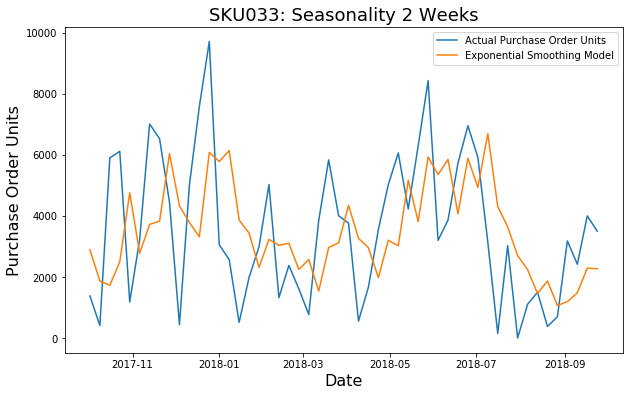

Exponential Smoothing Overstock 51696.807718236945
Exponential Smoothing Cuts 52952.31333332249
Original Cuts 65725
Model_Performance -12772.68666667751


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


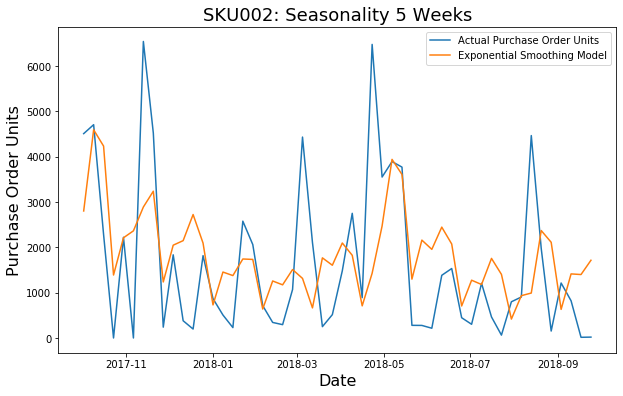

Exponential Smoothing Overstock 35261.35005347637
Exponential Smoothing Cuts 24573.70815629223
Original Cuts 33433
Model_Performance -8859.291843707771


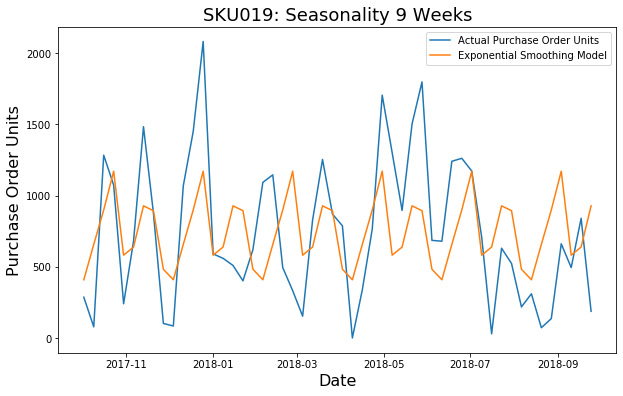

Exponential Smoothing Overstock 9729.737374875183
Exponential Smoothing Cuts 9729.713277330324
Original Cuts 13800
Model_Performance -4070.2867226696762


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


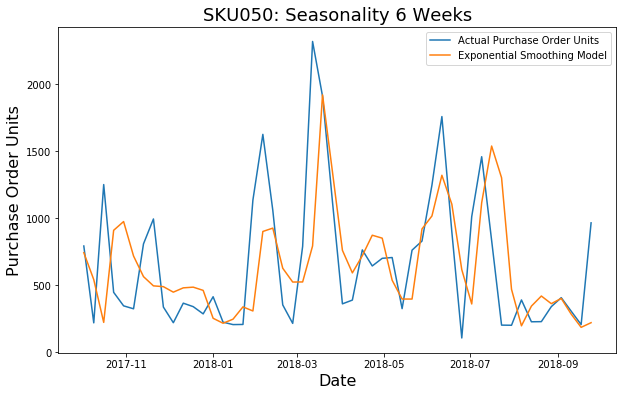

Exponential Smoothing Overstock 7881.928920064894
Exponential Smoothing Cuts 8703.589160156767
Original Cuts 12786
Model_Performance -4082.4108398432327


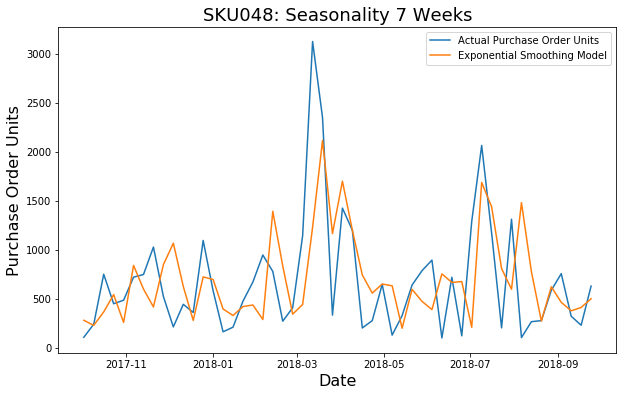

Exponential Smoothing Overstock 10058.920559570459
Exponential Smoothing Cuts 9315.172571828845
Original Cuts 12345
Model_Performance -3029.8274281711547


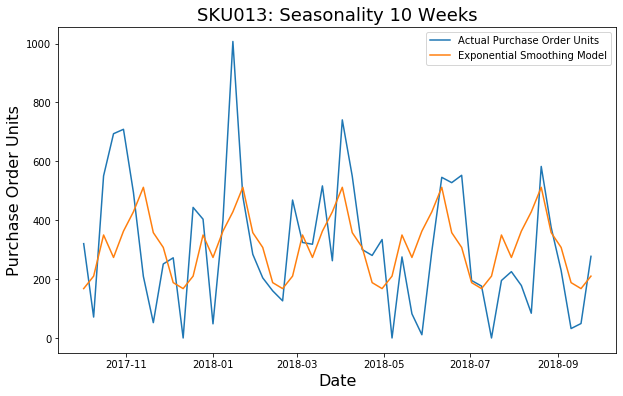

Exponential Smoothing Overstock 3925.2071376997014
Exponential Smoothing Cuts 3925.1961102218793
Original Cuts 5321
Model_Performance -1395.8038897781207


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


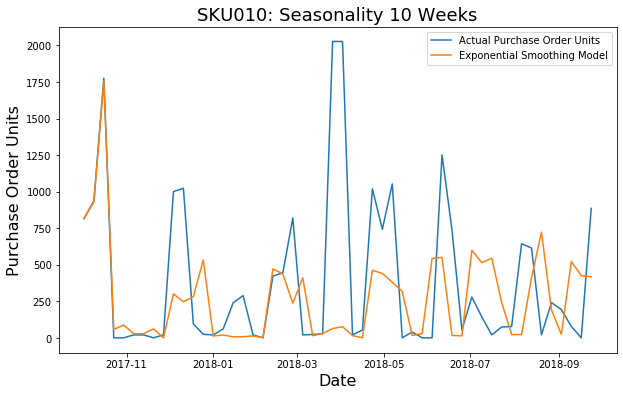

Exponential Smoothing Overstock 5201.817483119988
Exponential Smoothing Cuts 11245.571090196725
Original Cuts 9647
Model_Performance 1598.571090196725


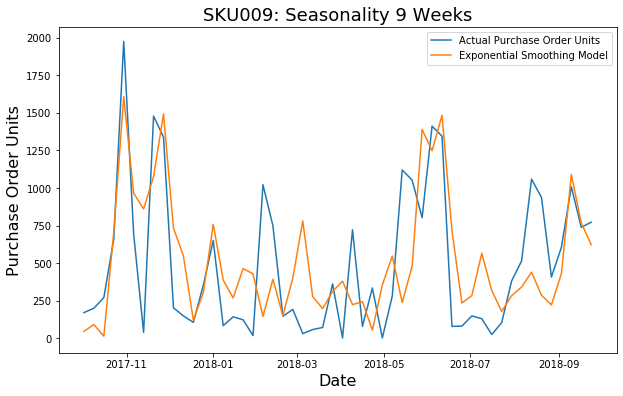

Exponential Smoothing Overstock 8573.67672972186
Exponential Smoothing Cuts 7045.382390142018
Original Cuts 9688
Model_Performance -2642.6176098579817


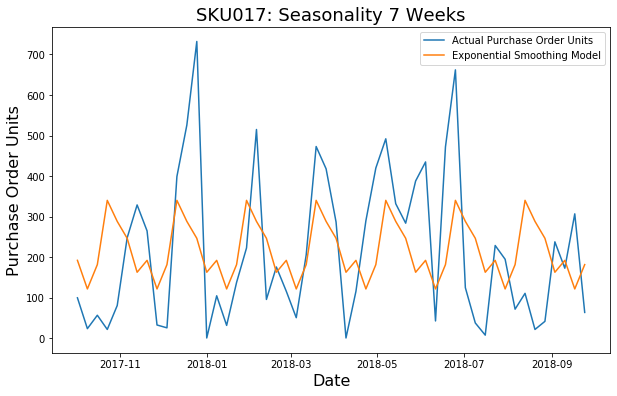

Exponential Smoothing Overstock 3676.0056211506635
Exponential Smoothing Cuts 3675.8261627134966
Original Cuts 4735
Model_Performance -1059.1738372865034


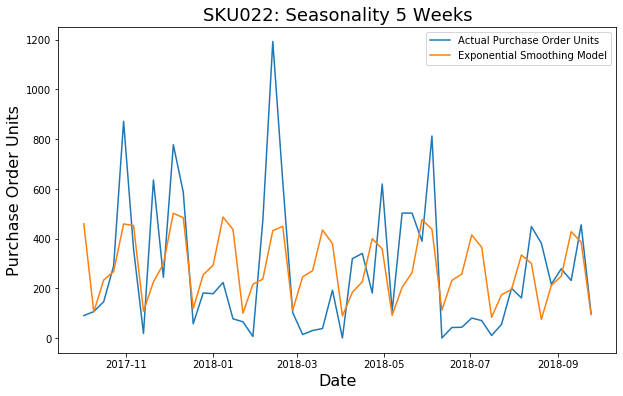

Exponential Smoothing Overstock 4972.639809883149
Exponential Smoothing Cuts 4410.249533987264
Original Cuts 5980
Model_Performance -1569.750466012736


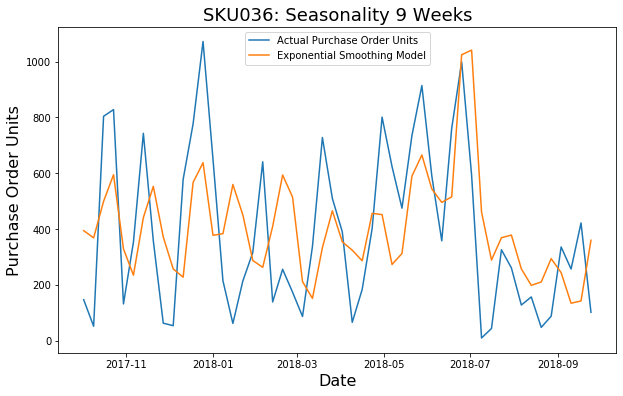

Exponential Smoothing Overstock 6126.265247132902
Exponential Smoothing Cuts 5332.921096755761
Original Cuts 7098
Model_Performance -1765.078903244239


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


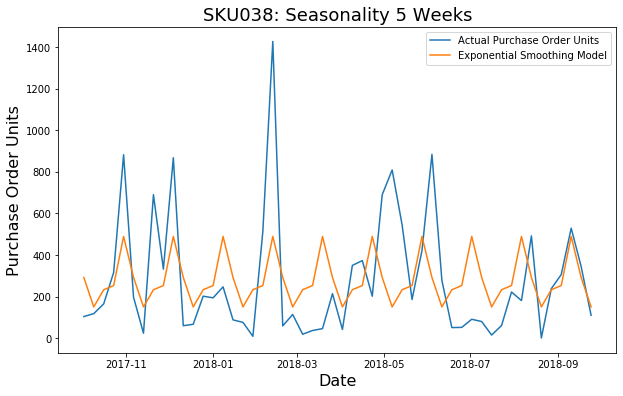

Exponential Smoothing Overstock 5242.908576823791
Exponential Smoothing Cuts 5242.909383597583
Original Cuts 5842
Model_Performance -599.0906164024173


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


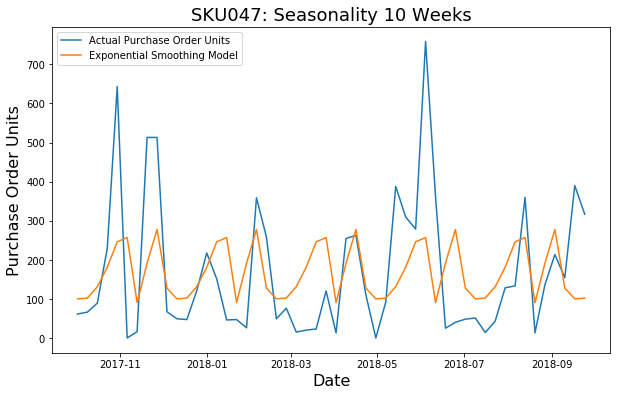

Exponential Smoothing Overstock 3135.005556963376
Exponential Smoothing Cuts 3134.523419185463
Original Cuts 3682
Model_Performance -547.4765808145371


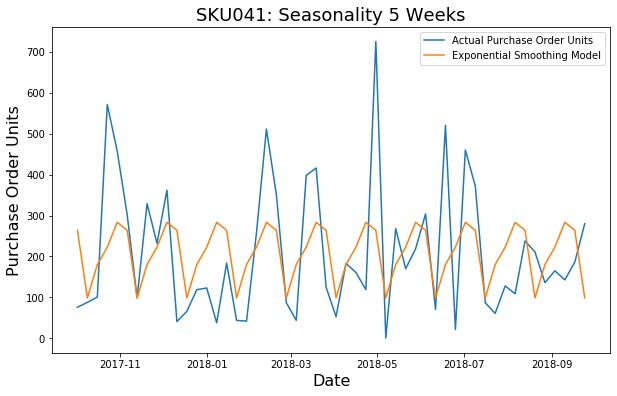

Exponential Smoothing Overstock 2963.145502649032
Exponential Smoothing Cuts 2963.145284326133
Original Cuts 4732
Model_Performance -1768.8547156738668


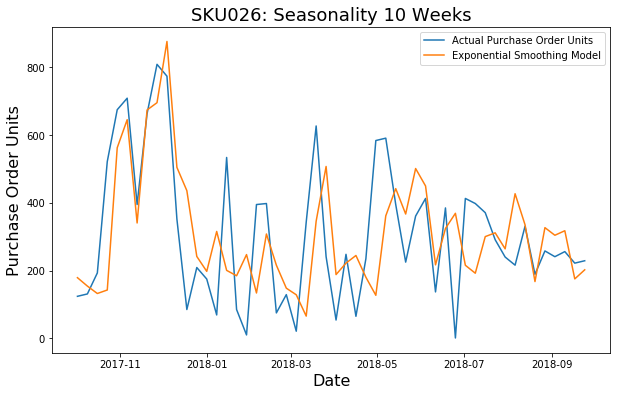

Exponential Smoothing Overstock 3449.9338213253973
Exponential Smoothing Cuts 3422.5119598633623
Original Cuts 5313
Model_Performance -1890.4880401366377
{'SKU033': 2, 'SKU002': 5, 'SKU019': 9, 'SKU050': 6, 'SKU048': 7, 'SKU013': 10, 'SKU010': 10, 'SKU009': 9, 'SKU017': 7, 'SKU022': 5, 'SKU036': 9, 'SKU038': 5, 'SKU047': 10, 'SKU041': 5, 'SKU026': 10}


In [28]:
# exponential smoothing without trend, multiplicative seasonality, on entire dataset
total_dic = {}
for j in sku_top15:
#     change below to see all, east or wast
    df_holts = df1[df1.DC.isin(["DC East","DC West"])].loc[df.SKU == j]
    full_set = df_holts.groupby("Date").sum().iloc[:,:]["Purchase Order Units"]+1
    fullfilled_units = df_holts.groupby("Date").sum().iloc[:,:]["Fulfilled Units"]+1
    aic_value = 9999
    for i in range(2,11):
        model = ExponentialSmoothing(full_set, seasonal="mul", seasonal_periods = i,freq="W-MON")
        model_fit = model.fit()
        if model_fit.aic < aic_value :
            aic_value = model_fit.aicc
            seasonality = i
            total_dic[j] = seasonality
            opt_model = model_fit

    pred = opt_model.predict(start=full_set.index[0], end=full_set.index[-1])
    plt.figure(figsize=(10,6))
    plt.plot(full_set.index, full_set, label='Actual Purchase Order Units')
    plt.plot(pred.index, pred, label='Exponential Smoothing Model')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Purchase Order Units', fontsize=16)
    plt.legend()
    plt.title("{}: Seasonality {} Weeks".format(j,seasonality), fontsize=18)
    plt.show()
    overstock = 0
    cuts_model = 0
    for i in (full_set - pred):
        if i < 0 :
            overstock += i
        elif i > 0 :
            cuts_model += i
    print("Exponential Smoothing Overstock", overstock*-1)
    print("Exponential Smoothing Cuts", cuts_model)
    cuts_original = 0
    for i in (full_set - fullfilled_units):
        if i > 0 :
            cuts_original += i
    print("Original Cuts", cuts_original)
    print("Model_Performance", cuts_model - cuts_original)



print(total_dic)
    
    
# model_fit.summary()

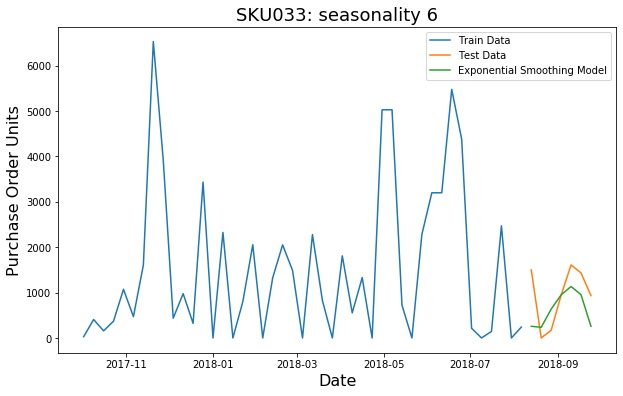

Holts winter overstock 706.335999813859
Holts winter cuts 2871.147402743587
original cuts 0
model_performance 2871.147402743587


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


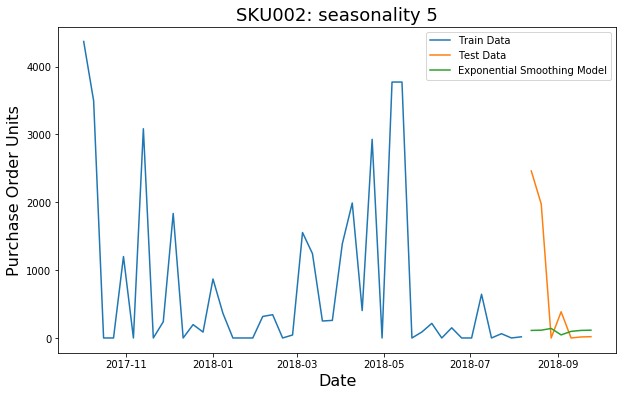

Holts winter overstock 429.63909820291997
Holts winter cuts 4549.494172226888
original cuts 1974
model_performance 2575.4941722268877


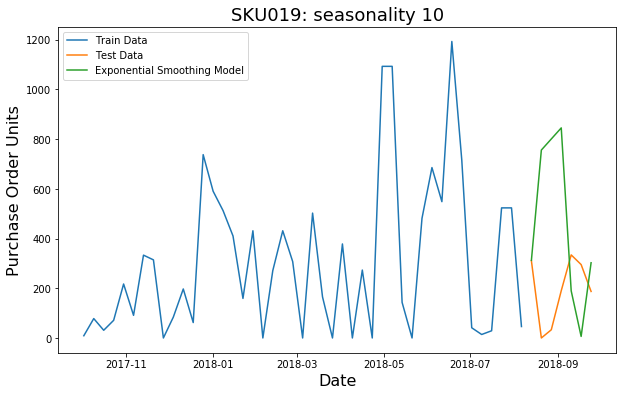

Holts winter overstock 2294.5309381966367
Holts winter cuts 433.3043570721103
original cuts 0
model_performance 433.3043570721103


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


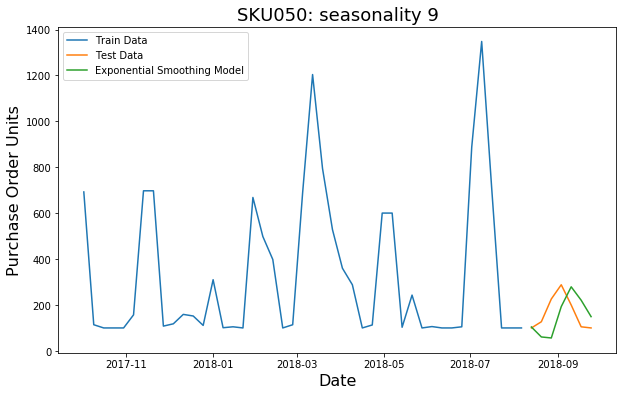

Holts winter overstock 248.24915949474322
Holts winter cuts 330.8851562238026
original cuts 0
model_performance 330.8851562238026


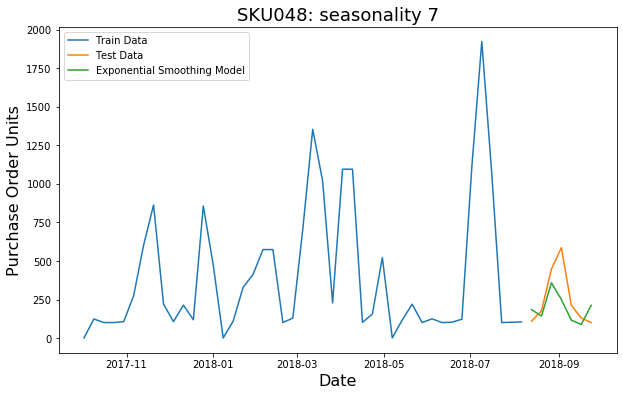

Holts winter overstock 186.93940495600006
Holts winter cuts 597.2663808745478
original cuts 268
model_performance 329.26638087454785


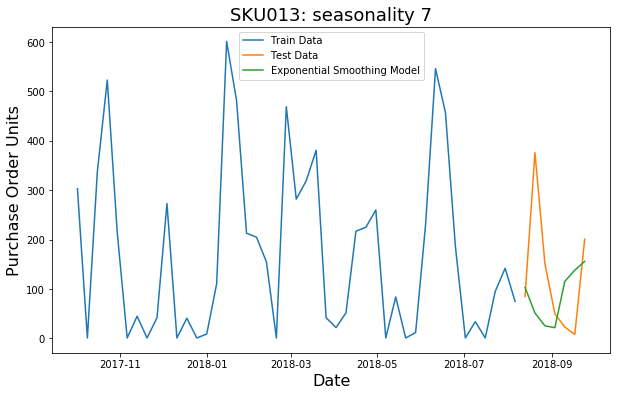

Holts winter overstock 241.17074196496014
Holts winter cuts 523.0825239666299
original cuts 150
model_performance 373.0825239666299


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


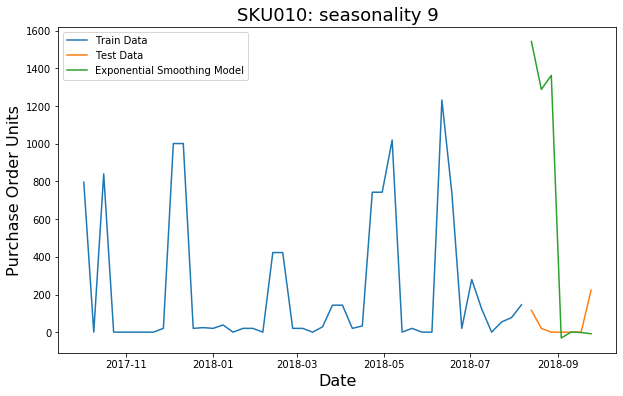

Holts winter overstock 4054.2256039076483
Holts winter cuts 264.585693667157
original cuts 223
model_performance 41.58569366715699


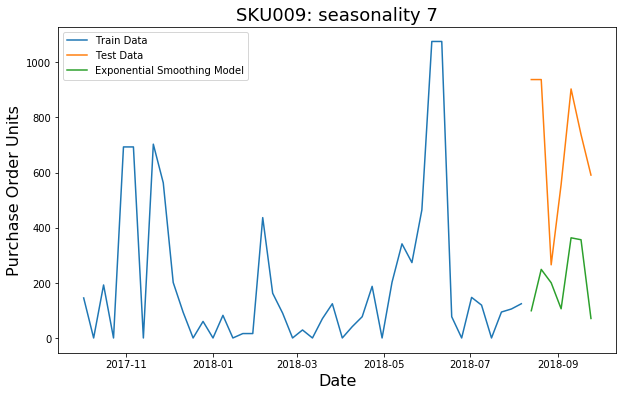

Holts winter overstock 0
Holts winter cuts 3479.9549345851274
original cuts 2359
model_performance 1120.9549345851274


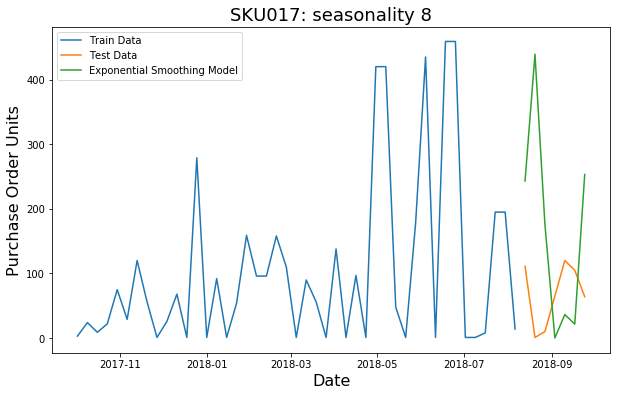

Holts winter overstock 925.247665790274
Holts winter cuts 231.72679064290912
original cuts 0
model_performance 231.72679064290912


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


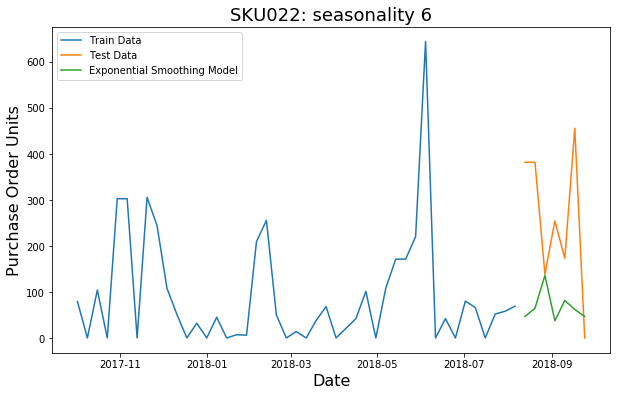

Holts winter overstock 46.60415242997099
Holts winter cuts 1354.8857697396902
original cuts 1090
model_performance 264.8857697396902


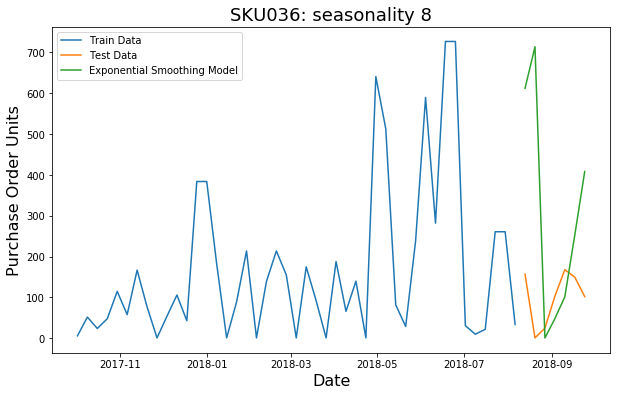

Holts winter overstock 1577.1260644108168
Holts winter cuts 145.45748529393342
original cuts 0
model_performance 145.45748529393342


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


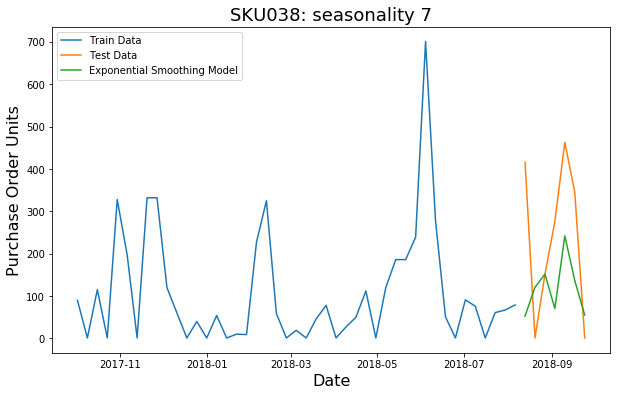

Holts winter overstock 174.37338509521462
Holts winter cuts 998.1571604983947
original cuts 600
model_performance 398.15716049839466


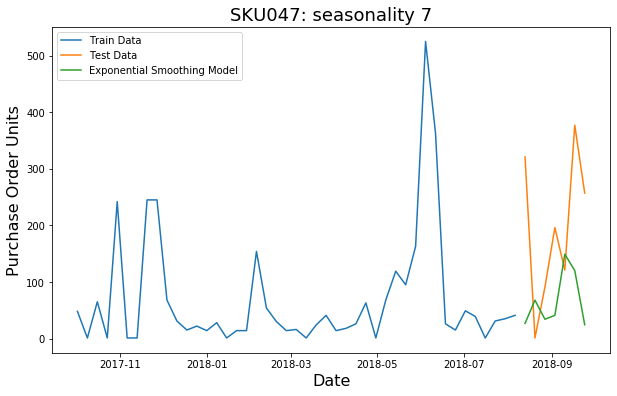

Holts winter overstock 94.91603170533675
Holts winter cuts 995.6721327971773
original cuts 696
model_performance 299.67213279717726


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


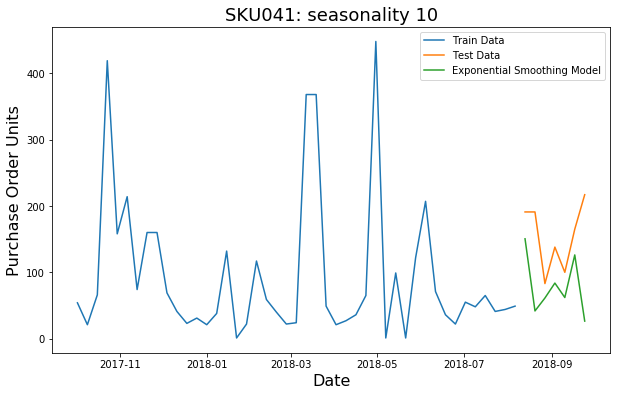

Holts winter overstock 0
Holts winter cuts 533.1295035419041
original cuts 491
model_performance 42.129503541904114


c:\program files\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


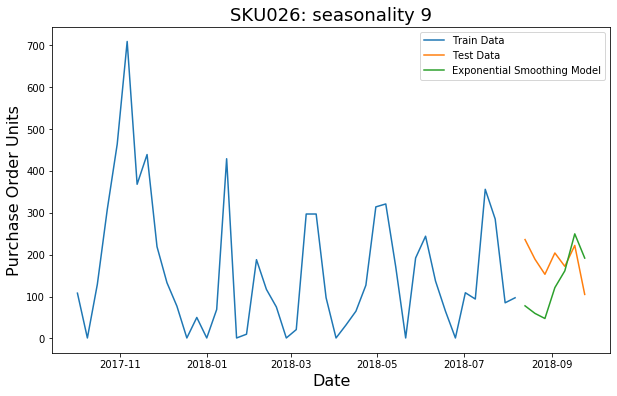

Holts winter overstock 114.42750036143144
Holts winter cuts 486.5355761355089
original cuts 409
model_performance 77.5355761355089
{'SKU033': 6, 'SKU002': 5, 'SKU019': 10, 'SKU050': 9, 'SKU048': 7, 'SKU013': 7, 'SKU010': 9, 'SKU009': 7, 'SKU017': 8, 'SKU022': 6, 'SKU036': 8, 'SKU038': 7, 'SKU047': 7, 'SKU041': 10, 'SKU026': 9}


In [29]:
# split data into train and test

total_dic = {}
for j in sku_top15:
    #     change below to see all, east or wast
    df_holts = df1[df1.DC.isin(["DC West"])].loc[df.SKU == j]
    train_set = df_holts.groupby("Date").sum().iloc[:45,:]["Purchase Order Units"] + 1
    test_set = df_holts.groupby("Date").sum().iloc[45:,:]["Purchase Order Units"] + 1
    benchmark = df_holts.groupby("Date").sum().iloc[45:,:]["Fulfilled Units"]+1
    aic_value = 9999
    for i in range(2,11):
        model = ExponentialSmoothing(train_set, seasonal="mul", seasonal_periods = i,freq="W-MON")
        model_fit = model.fit()
        if model_fit.aic < aic_value :
            aic_value = model_fit.aicc
            seasonality = i
            total_dic[j] = seasonality
            opt_model = model_fit
            
    pred = opt_model.predict(start=test_set.index[0], end=test_set.index[-1])
    plt.figure(figsize=(10,6))
    plt.xlabel('Date',fontsize=16)
    plt.ylabel('Purchase Order Units',fontsize=16)
    plt.plot(train_set.index, train_set, label='Train Data')
    plt.plot(test_set.index, test_set, label='Test Data')
    plt.plot(pred.index, pred, label='Exponential Smoothing Model')
#     plt.plot(benchmark.index, benchmark, label='Fulfilled-units')
    plt.legend()
    plt.title("{}: seasonality {}".format(j,seasonality),fontsize=18)
    plt.show()
    overstock = 0
    cuts_model = 0
    for i in (test_set - pred):
        if i < 0 :
            overstock += i
        elif i > 0 :
            cuts_model += i
    print("Holts winter overstock", overstock*-1)
    print("Holts winter cuts", cuts_model)
    cuts_original = 0
    for i in (test_set - benchmark):
        if i > 0 :
            cuts_original += i
    print("original cuts", cuts_original)
    print("model_performance", cuts_model - cuts_original)



print(total_dic)
    
    
# model_fit.summary()

In [30]:
# Data we need : what was the overstock at each period

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import math
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
new_df["cuts"] = new_df['Purchase Order Units'] - new_df['Fulfilled Units']

In [33]:
new_df = new_df.dropna()

In [34]:
new_df.columns[5:]

Index(['On Hand Inventory', 'Pageview Out of Stock', 'Average Price',
       'Change in Pageviews', 'Consumer Ordered Units', 'Forecast 1 Week',
       'Forecast 4 Week', 'Forecast 8 Week', 'prior_cut_size',
       'prior_cost_of_cut', 'prior_dispatch_rate', 'Prior_Inven_Change',
       'Prior_Price_change', 'cuts'],
      dtype='object')

In [ ]:
def temp_funct(x):
    if x>0 :
        return 1
    else :
        return 0

In [ ]:
new_df_west = new_df[new_df.DC.isin(["DC West"])]
new_df_west["cuts"] = new_df_west["cuts"].apply(temp_funct)

In [ ]:
new_df_west

In [ ]:

cols = ['On Hand Inventory', 'Pageview Out of Stock', 'Average Price',
       'Change in Pageviews', 'Consumer Ordered Units', 'prior_cut_size',
       'prior_cost_of_cut', 'Prior_Inven_Change',
       'Prior_Price_change']
X_train, X_test, y_train, y_test = train_test_split(new_df_west[cols], new_df_west['cuts'], test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train) 
clf.predict(X_test) 
score = clf.score(X_test,y_test)
# log = LogisticRegression().fit(X_train, y_train)
# log.predict(X_train)
# score = log.score(X_train, y_train)
# print(score)
clf.feature_importances_

In [ ]:
clf.predict(X_test)

In [ ]:
y_test

In [ ]:
benchmark = new_df_west.loc[y_test.index,:]["Fulfilled Units"]

In [ ]:
y_train

In [ ]:
overstock = 0
cuts = 0
for i in (clf.predict(X_test)+500 - y_test):
    if i > 0:
        overstock += i
    elif i <0 :
        cuts += i 
print(overstock)
print(cuts)

In [ ]:
new_df_west.cuts.sum()

In [ ]:
y_train

In [ ]:
overstock = 0
cuts = 0
for i in (benchmark - y_test):
    if i > 0:
        overstock += i
    elif i <0 :
        cuts += i 
print(overstock)
print(cuts)

In [ ]:
new_df[new_df.DC == "DC West"][df.SKU == "SKU048"]